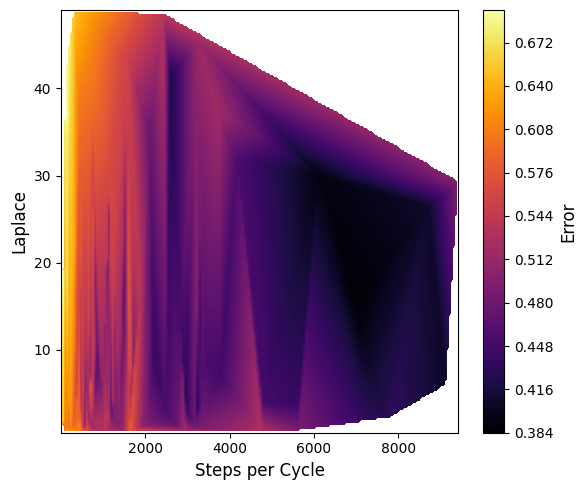

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

df = pd.read_csv("./grid_results.csv")

# Extract columns
x = df["steps_per_cycle"]
y = df["laplace"]
z = df["error"]

xi = np.linspace(x.min(), x.max(), 200)
yi = np.linspace(y.min(), y.max(), 200)
Xi, Yi = np.meshgrid(xi, yi)

Zi = griddata((x, y), z, (Xi, Yi), method='linear')

# Plot contour
fig, ax = plt.subplots(figsize=(6, 5))
cp = ax.contourf(Xi, Yi, Zi, levels=200, cmap='inferno')
cbar = fig.colorbar(cp)
cbar.set_label('Error', fontsize=12)
ax.set_xlabel("Steps per Cycle", fontsize=12)
ax.set_ylabel("Laplace", fontsize=12)
fig.tight_layout()
plt.show()
fig.savefig("./figures/grid.pdf")


In [3]:
pivot

steps_per_cycle,2,4,100,103,107,108,109,110,113,121,...,6115,6422,6999,7139,7481,7789,7852,8725,9134,9423
laplace,,,,,,,,,,,,,,,,,,,,,
0.509527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.535763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.594327,NaN,NaN,NaN,NaN,0.591105,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.610872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.630217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43.679259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44.499755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45.200014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
